<a href="https://colab.research.google.com/github/obeabi/ProjectPortfolio/blob/master/AirFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airfoil Self-Noise Data Set
## Written by: Abiola Obembe
### Date : 2020-09-17
#### Objective: Predict Scaled sound pressure level, in decibels given the following attributes:
#### 1. Frequency, in Hertzs.
#### 2. Angle of attack, in degrees.
#### 3. Chord length, in meters.
#### 4. Free-stream velocity, in meters per second.
#### 5. Suction side displacement thickness, in meters.

## Import libraries

In [108]:
# import required depednecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print("Installtion completed successfully!")


Installtion completed successfully!


## Data Preprocessing

In [109]:
# load dataset and include column headers
dataset = pd.read_csv('airfoil_self_noise.csv',header= None)
cols = ['Frequency','AngleAttack','ChordLength','Velocity','Thickness','SoundPressure']

dataset.columns = cols
dataset.head()

,Frequency,AngleAttack,ChordLength,Velocity,Thickness,SoundPressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [110]:
# Check shape of dataset and missing values
print("The shape of the dataset is:", (dataset.shape))
print("The number of rows in the dataset is:", str(dataset.shape[0]))
print("The number of columns in the dataset is:", str(dataset.shape[1]))

missing_values = dataset.isnull().sum().sum()

print("The number of missing values the dataset is:", str(missing_values))

The shape of the dataset is: (1503, 6)
The number of rows in the dataset is: 1503
The number of columns in the dataset is: 6
The number of missing values the dataset is: 0


In [111]:
# Check for data types
dataset.dtypes

Frequency          int64
AngleAttack      float64
ChordLength      float64
Velocity         float64
Thickness        float64
SoundPressure    float64
dtype: object

In [112]:
# Print dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Frequency      1503 non-null   int64  
 1   AngleAttack    1503 non-null   float64
 2   ChordLength    1503 non-null   float64
 3   Velocity       1503 non-null   float64
 4   Thickness      1503 non-null   float64
 5   SoundPressure  1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [113]:
# Check statistics of dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,1503.0,2886.380572,3152.573137,200.000000,800.000000,1600.000000,4000.000000,20000.000000
AngleAttack,1503.0,6.782302,5.918128,0.000000,2.000000,5.400000,9.900000,22.200000
ChordLength,1503.0,0.136548,0.093541,0.025400,0.050800,0.101600,0.228600,0.304800
Velocity,1503.0,50.860745,15.572784,31.700000,39.600000,39.600000,71.300000,71.300000
Thickness,1503.0,0.011140,0.013150,0.000401,0.002535,0.004957,0.015576,0.058411
SoundPressure,1503.0,124.835943,6.898657,103.380000,120.191000,125.721000,129.995500,140.987000


In [114]:
# Create a new datframe to work with
df_new = dataset
df_a = df_new.drop(['SoundPressure'], axis=1)
df_a.head()

,Frequency,AngleAttack,ChordLength,Velocity,Thickness
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [115]:
# Check for outliers
from scipy import stats
zscore = np.abs(stats.zscore(df_a))
zscore


array([[0.66, 1.15, 1.8 , 1.31, 0.64],
       [0.6 , 1.15, 1.8 , 1.31, 0.64],
       [0.52, 1.15, 1.8 , 1.31, 0.64],
       ...,
       [0.35, 1.49, 0.37, 0.72, 3.17],
       [0.67, 1.49, 0.37, 0.72, 3.17],
       [1.08, 1.49, 0.37, 0.72, 3.17]])

In [116]:
print(np.where (zscore >3))

(array([  12,   13,   28,   47,   78,   79,   96,  173,  198,  199,  200,
        313,  314,  315,  466,  467,  482,  483,  524,  525,  540,  709,
        710,  711,  712,  713,  714,  715,  716,  717,  718,  719,  720,
        721,  722,  723,  724,  737,  750,  763,  776,  786,  969,  970,
        971,  980,  981,  982,  992,  993, 1005, 1006, 1015, 1016, 1017,
       1027, 1028, 1029, 1253, 1267, 1487, 1488, 1489, 1490, 1491, 1492,
       1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4]))


In [117]:
# Check for correlation in dataset
dataset.corr()

,Frequency,AngleAttack,ChordLength,Velocity,Thickness,SoundPressure
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
AngleAttack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
ChordLength,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
SoundPressure,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


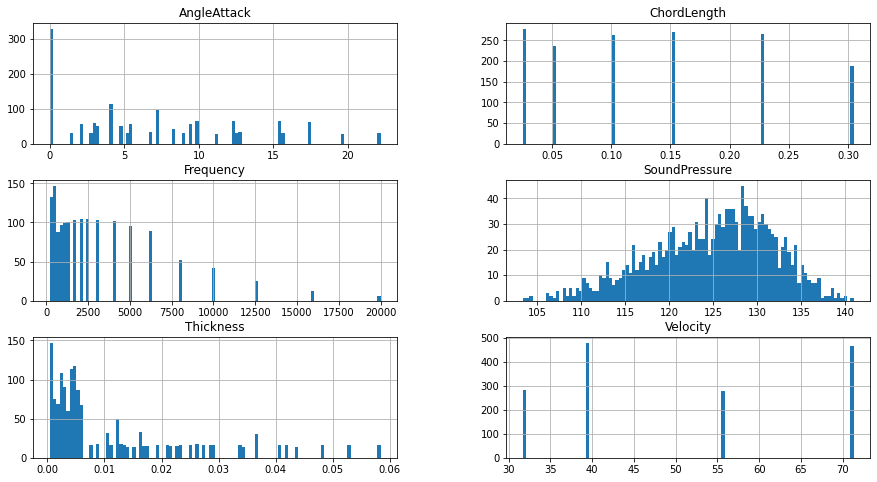

In [118]:
# Visualize histogram of dataset
dataset.hist(figsize= (15,8), bins= 100)
plt.show()

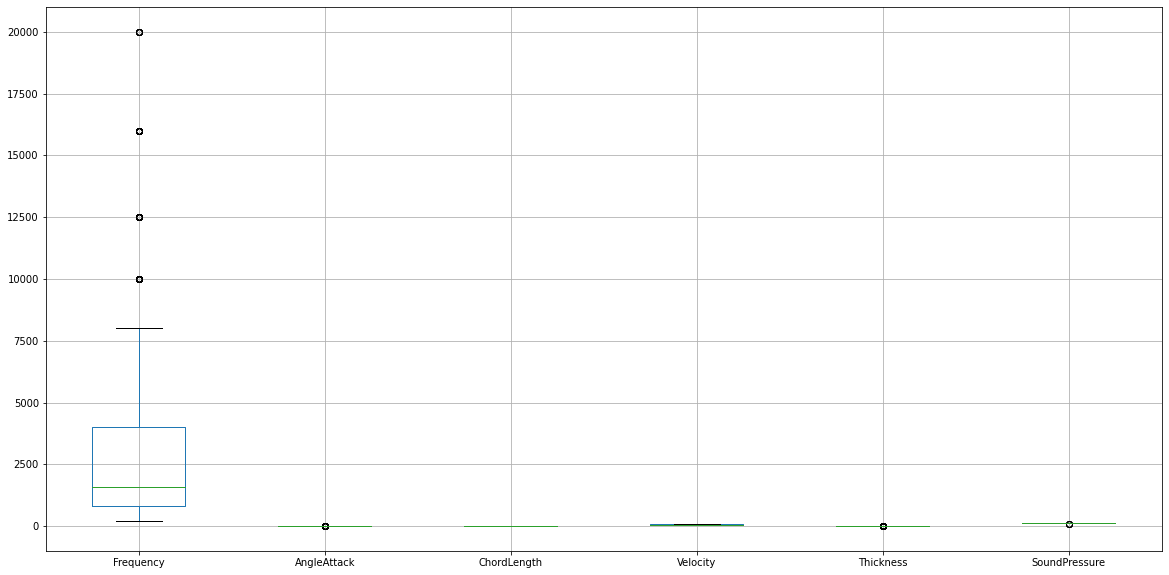

In [119]:
# Boxplot of dataframe
dataset.boxplot(figsize= (20,10) )
plt.show()

### Skewness Check
#### The high value of skewness implies the distribution is highly skewed. Specifically, the positive value implies poistively skewed distribution. The large kurtosis value indicates heavy tails/outliers. It is therfore important to transform the variables with high skewness to address the skewness.

The skewness of Frequency column is: 2.1370843370561032
The kurtosis of Frequency column is: 5.708685076629566


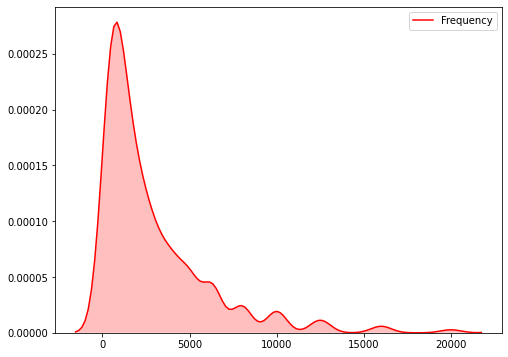

In [120]:
# Statistical analysis on Frequency column
print("The skewness of Frequency column is:", dataset['Frequency'].skew())
print("The kurtosis of Frequency column is:", dataset['Frequency'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['Frequency'], shade=True, color="r")
plt.show()

The skewness of AngleAttack column is: 0.6891644015246552
The kurtosis of AngleAttack column is: -0.4129507932946681


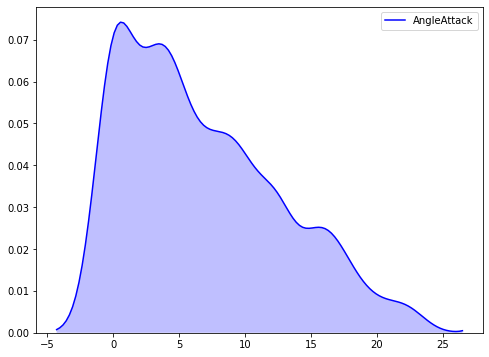

In [121]:
# Statistical analysis on AngleAttack column
print("The skewness of AngleAttack column is:", dataset['AngleAttack'].skew())
print("The kurtosis of AngleAttack column is:", dataset['AngleAttack'].kurtosis())

plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['AngleAttack'], shade=True, color="b")
plt.show()

The skewness of ChordLength column is: 0.4574574796795428
The kurtosis of ChordLengthcolumn is: -1.037964096539102


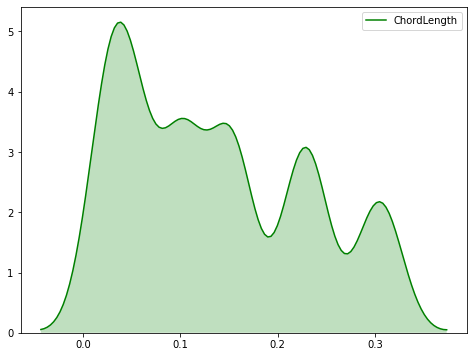

In [122]:
# Statistical analysis on ChordLength column
print("The skewness of ChordLength column is:", dataset['ChordLength'].skew())
print("The kurtosis of ChordLengthcolumn is:", dataset['ChordLength'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['ChordLength'], shade=True, color="g")
plt.show()

The skewness of Velocity column is: 0.23585241419124836
The kurtosis of Velocity column is: -1.5639512742591497


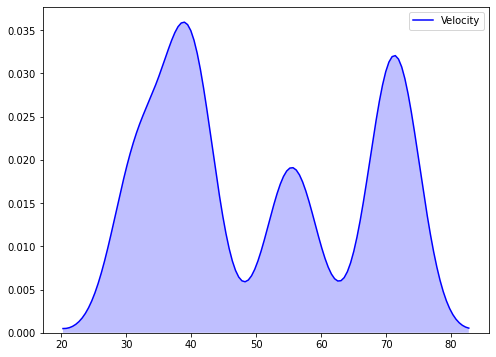

In [123]:
# Statistical analysis on Velocity column
print("The skewness of Velocity column is:", dataset['Velocity'].skew())
print("The kurtosis of Velocity column is:", dataset['Velocity'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['Velocity'], shade=True, color="b")
plt.show()

The skewness of Thickness column is: 1.702164556088956
The kurtosis of Thickness column is: 2.218903124436664


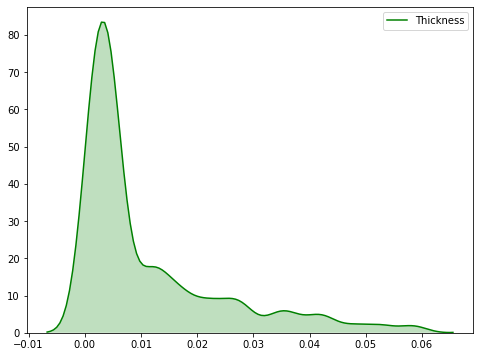

In [124]:
# Statistical analysis on Thickness column
print("The skewness of Thickness column is:", dataset['Thickness'].skew())
print("The kurtosis of Thickness column is:", dataset['Thickness'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['Thickness'], shade=True, color="g")
plt.show()

The skewness of SoundPressure column is: -0.41895218773468573
The kurtosis of SoundPressure column is: -0.31418730019313745


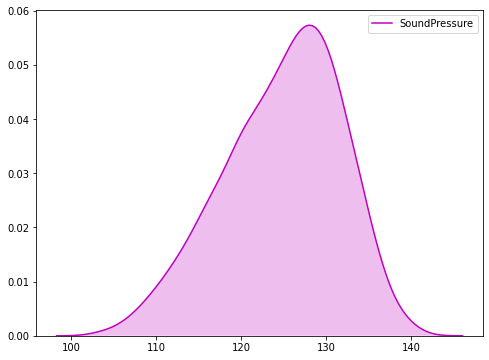

In [125]:
# Statistical analysis on SoundPressure column
print("The skewness of SoundPressure column is:", dataset['SoundPressure'].skew())
print("The kurtosis of SoundPressure column is:", dataset['SoundPressure'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['SoundPressure'], shade=True, color="m")
plt.show()

In [126]:
# diagnostic plot to confirm skewness/outliers
def diagnostic_plots(df,variable):
  # functin to plot a histogram and Q-Q plot 
  
  plt.figure(figsize = (15,6))
  plt.subplot(1,3,1)
  df[variable].hist()
  
  plt.subplot(1,3,2)
  stats.probplot(df[variable], dist = "norm", plot = plt)

  plt.subplot(1,3,3)
  df[variable].plot(kind = 'box')
  
  #diagnostic_plots(df,'Age') # how to use function
  
  plt.show()

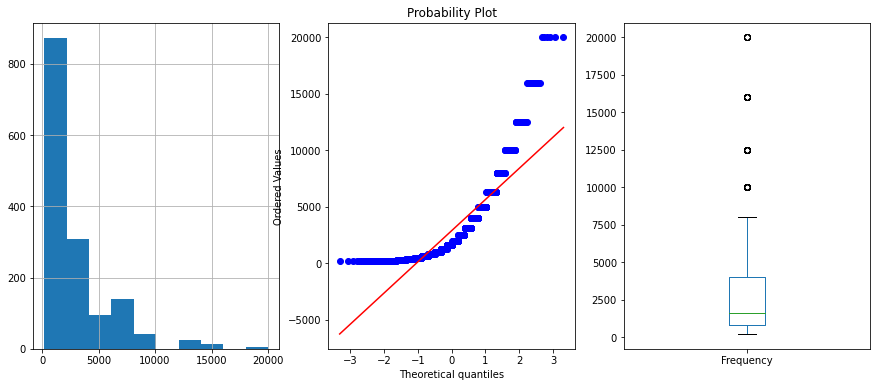

In [127]:
diagnostic_plots(dataset,'Frequency')

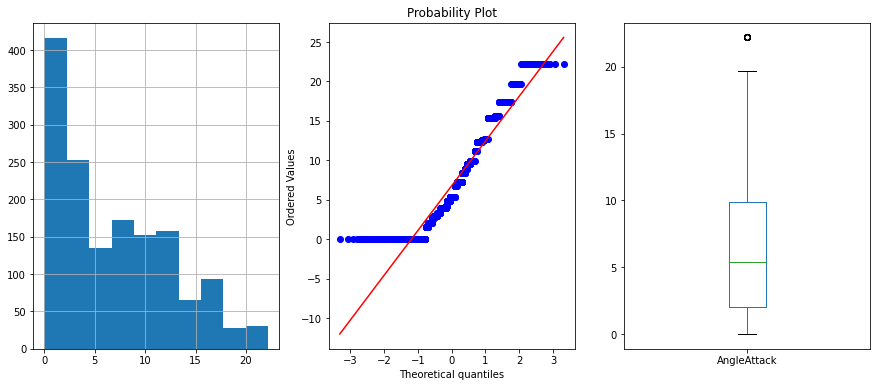

In [128]:
# Confirm skewness with Q-Q plot for AngleAttack
diagnostic_plots(dataset, 'AngleAttack')

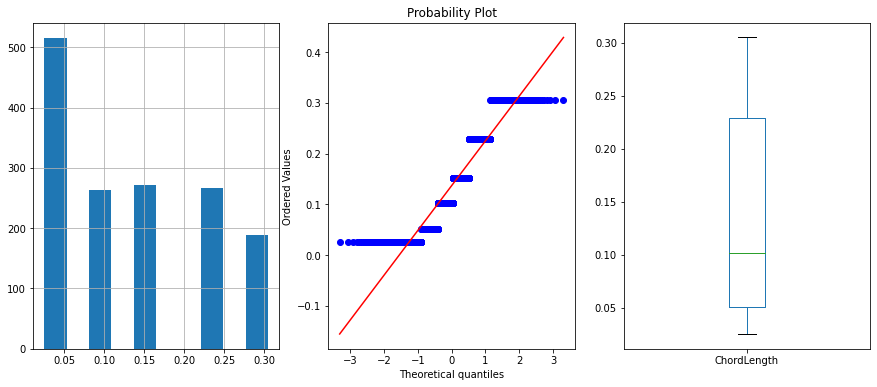

In [129]:
# Confirm skewness with Q-Q plot for ChordLength
diagnostic_plots(dataset, 'ChordLength')

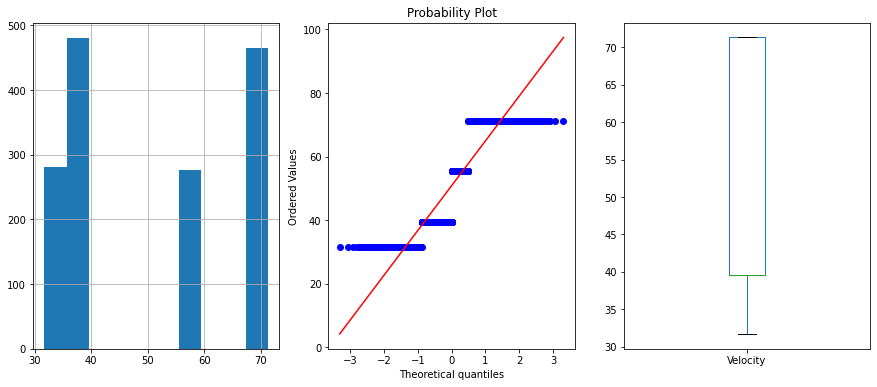

In [130]:
# Confirm skewness with Q-Q plot for Velocity
diagnostic_plots(dataset, 'Velocity')

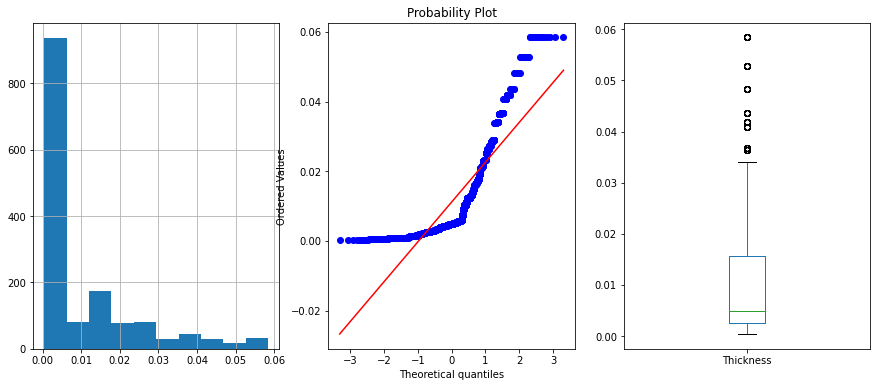

In [131]:
# Confirm skewness with Q-Q plot for Thickness
diagnostic_plots(dataset, 'Thickness')

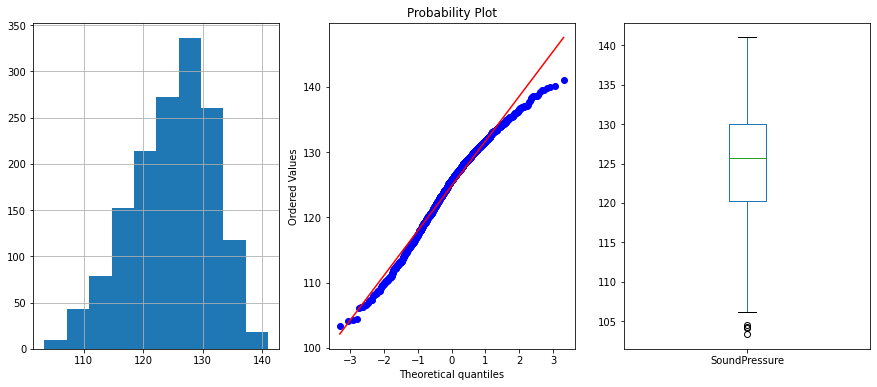

In [132]:
# Confirm skewness with Q-Q plot for target variable SondPressure
diagnostic_plots(dataset, 'SoundPressure')

In [133]:
#  Finding numerical and categorical columns from original dataframe
num_cols = df_a.select_dtypes(exclude ='object').columns.tolist()
cat_cols = df_a.select_dtypes(include='object').columns.tolist()

print(num_cols)
print(cat_cols)

['Frequency', 'AngleAttack', 'ChordLength', 'Velocity', 'Thickness']
[]


In [134]:
## For simplicity remove all data with outliers
df = dataset
df = df[(zscore <3).all(axis = 1)]
print("The shape of the original dataframe is :", df_a.shape)
print("The shape of the clean dataframe is :", df.shape)

deleted_entries = df_a.shape[0] - df.shape[0]
print("Entries deleted in the dataframe are :",  deleted_entries)

The shape of the original dataframe is : (1503, 5)
The shape of the clean dataframe is : (1427, 6)
Entries deleted in the dataframe are : 76


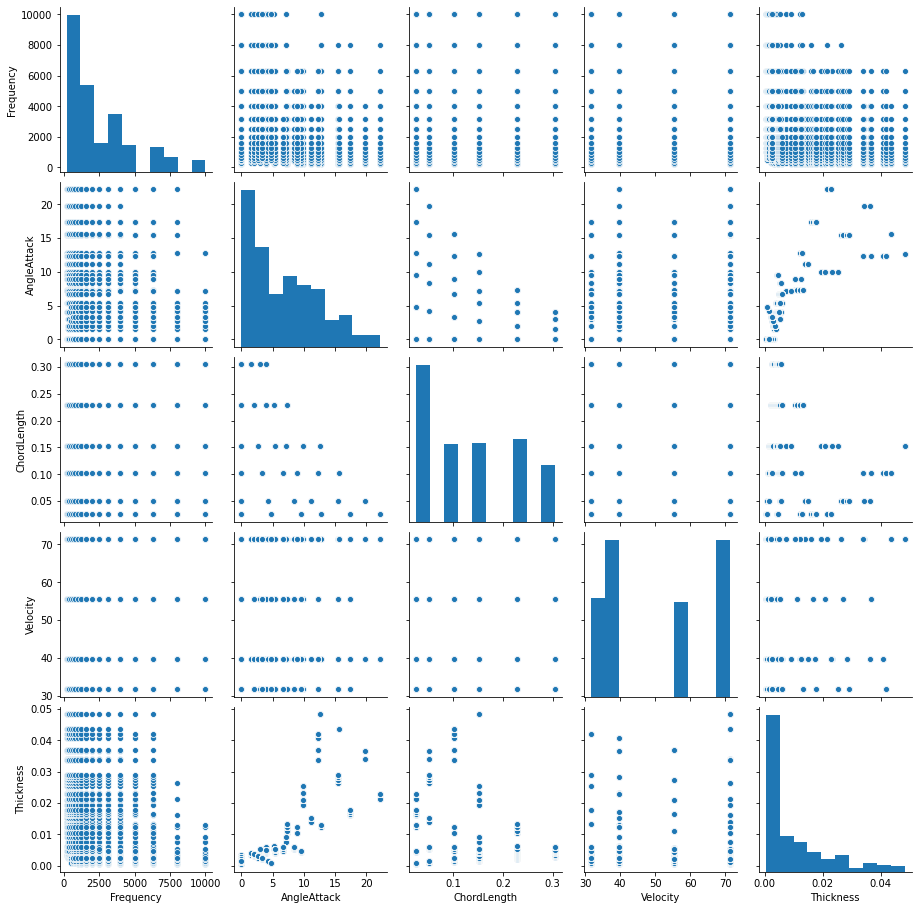

In [135]:
# pairplot on numerical variables
sns.pairplot(df[num_cols])
plt.show()

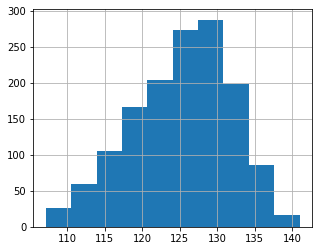

In [136]:
# Explore target variable
df['SoundPressure'].hist()
plt.show()

Text(0.5, 1.0, 'Scaled Sound Pressure Level vs Frequency')

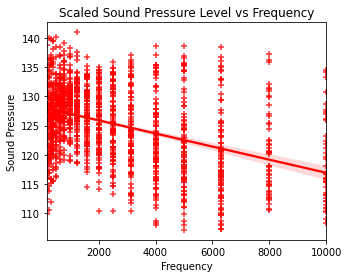

In [137]:
# Examine correlation between Frequency and target variable
plt.figure()
ax = sns.regplot( x = 'Frequency', y = 'SoundPressure', data = df, color = 'red', marker = '+')
ax.set( xlabel = 'Frequency', ylabel = 'Sound Pressure')
ax.set_title('Scaled Sound Pressure Level vs Frequency')

Text(0.5, 1.0, 'Scaled Sound Pressure Level vs Velocity')

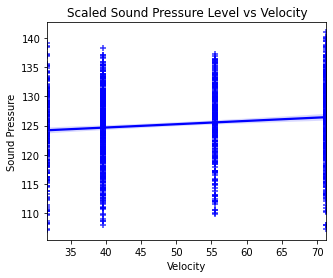

In [138]:
# Examine correlation between Velocity and target variable
plt.figure()
ax = sns.regplot( x = 'Velocity', y = 'SoundPressure', data = df, color = 'blue', marker = '+')
ax.set( xlabel = 'Velocity', ylabel = 'Sound Pressure')
ax.set_title('Scaled Sound Pressure Level vs Velocity')

Text(0.5, 1.0, 'Scaled Sound Pressure Level vs Thickness')

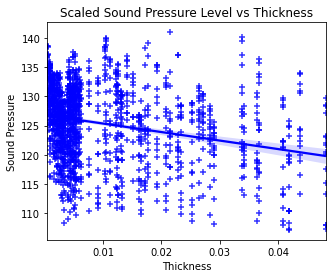

In [139]:
# Examine correlation between Thickness and target variable
plt.figure()
ax = sns.regplot( x = 'Thickness', y = 'SoundPressure', data = df, color = 'blue', marker = '+')
ax.set( xlabel = 'Thickness', ylabel = 'Sound Pressure')
ax.set_title('Scaled Sound Pressure Level vs Thickness')

Text(0.5, 1.0, 'Scaled Sound Pressure Level vs Chord Length')

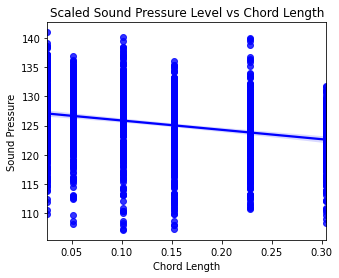

In [140]:
# Examine correlation between Chord Length and target variable
plt.figure()
ax = sns.regplot( x = 'ChordLength', y = 'SoundPressure', data = df, color = 'blue', marker = 'o')
ax.set( xlabel = 'Chord Length', ylabel = 'Sound Pressure')
ax.set_title('Scaled Sound Pressure Level vs Chord Length')

In [141]:
# Split dataframe into X and y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y = y.reshape(len(y),1)
print(X.shape)
print(y.shape)
print("The total number of rows in the feature X dataset is" + " " +  str(X.shape[0]))
print("The total number of attributes in X is" + " " +  str(X.shape[1]))
print("The total number of observations in y is" + " " + str(y.shape[0]))

(1427, 5)
(1427, 1)
The total number of rows in the feature X dataset is 1427
The total number of attributes in X is 5
The total number of observations in y is 1427


In [142]:
# Print first three rows of X
print(X[0:3,:])

[[8.00e+02 0.00e+00 3.05e-01 7.13e+01 2.66e-03]
 [1.00e+03 0.00e+00 3.05e-01 7.13e+01 2.66e-03]
 [1.25e+03 0.00e+00 3.05e-01 7.13e+01 2.66e-03]]


In [143]:
# print first few rows of y
print(y[0:3])
type(y)

[[126.2 ]
 [125.2 ]
 [125.95]]


numpy.ndarray

In [144]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1284, 5)
(143, 5)
(1284, 1)
(143, 1)


In [145]:
print(X_train)

[[3.15e+02 1.23e+01 1.02e-01 3.17e+01 4.19e-02]
 [5.00e+02 2.00e+00 2.29e-01 5.55e+01 3.14e-03]
 [8.00e+03 1.27e+01 2.54e-02 7.13e+01 1.22e-02]
 ...
 [1.00e+03 1.74e+01 2.54e-02 7.13e+01 1.61e-02]
 [8.00e+02 2.00e+00 2.29e-01 7.13e+01 2.93e-03]
 [1.00e+03 1.27e+01 2.54e-02 7.13e+01 1.22e-02]]


## Regression Models

#### Multiple Linear Regression

In [146]:
# Build MLR model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Coefficients:' , regressor.coef_)
print('Intercept:', regressor.intercept_)

Coefficients: [[-1.51e-03 -4.43e-01 -3.43e+01  9.90e-02 -1.09e+02]]
Intercept: [133.07]


In [147]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[121.98 116.18]
 [123.3  121.41]
 [117.28 111.14]
 [129.57 128.96]
 [128.53 136.54]
 [130.83 127.25]
 [123.55 125.21]
 [119.03 120.86]
 [123.21 122.4 ]
 [120.29 114.48]
 [129.7  128.44]
 [122.53 121.12]
 [126.23 128.25]
 [124.63 127.31]
 [126.3  127.32]
 [128.19 131.72]
 [123.38 128.68]
 [126.98 125.87]
 [123.35 118.34]
 [128.05 126.93]
 [125.02 138.27]
 [131.55 130.14]
 [128.42 131.8 ]
 [121.8  120.51]
 [124.13 128.42]
 [119.82 113.31]
 [126.4  126.84]
 [126.   127.93]
 [117.   120.61]
 [125.19 128.68]
 [122.42 121.4 ]
 [125.62 126.65]
 [123.18 123.42]
 [132.06 125.45]
 [121.33 119.17]
 [126.23 114.04]
 [120.33 118.13]
 [127.12 128.45]
 [120.37 115.3 ]
 [132.49 127.4 ]
 [130.   134.05]
 [128.74 131.45]
 [126.65 124.17]
 [126.16 123.97]
 [130.   121.62]
 [117.75 119.65]
 [127.14 127.47]
 [118.82 113.33]
 [125.56 119.11]
 [122.87 124.45]
 [124.03 124.11]
 [127.54 125.74]
 [121.02 117.5 ]
 [112.79 110.22]
 [119.17 115.22]
 [121.19 119.78]
 [123.93 125.72]
 [124.26 130.99]
 [126.97 127.5

In [148]:
# Evaluate MLR model for training set
y_hat = regressor.predict(X_train)
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))
print("Variance score for training set: %.2f" % regressor.score(X_train, y_train))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_train,y_hat))


Residual sum of square for training set: 21.66 
Variance score for training set: 0.48
R2- score for test set: 0.48


In [149]:
# Evaluate MLR model for test set

print("Residual sum of square for test set: %.2f " % np.mean((y_pred -y_test)**2))
print("Variance score for test set: %.2f" % regressor.score(X_test, y_test))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 26.09 
Variance score for test set: 0.48
R2- score for test set: 0.48


#### Polynomial Regression

In [150]:
# Training the Polynomial Regression model on the training dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
print('Coefficients:' , regressor.coef_)
print('Intercept:', regressor.intercept_)


Coefficients: [[ 1.24e-01  6.45e-03  1.15e+00  6.17e+01 -3.64e-01  5.15e+02 -1.02e-06
  -6.63e-05 -4.44e-02  6.60e-05 -5.10e-01 -6.82e-02 -1.27e+01 -3.15e-02
  -1.04e+02 -4.36e+02  1.62e+00  4.45e+01  3.04e-03  4.38e+01 -3.86e+01
   4.19e-11 -1.75e-08  1.63e-06 -1.18e-09  3.76e-05 -7.45e-07 -9.83e-04
   2.28e-06  1.33e-02  5.55e-02  3.39e-05  1.04e+00 -4.66e-07 -1.93e-03
   1.14e+00  1.65e-03  1.41e+00  3.53e-04  4.63e+00  3.11e+01  9.12e-02
  -3.03e+02  2.55e-04 -2.32e+00 -6.78e+02  5.49e+02  1.82e-01  2.82e+01
  -1.31e-02 -1.42e+02  1.70e+00 -8.87e-07 -9.28e-02  4.56e+02 -3.15e+00]]
Intercept: [126.27]


In [151]:
# Evaluate MLR model for training set
y_hat = regressor.predict(poly_reg.transform(X_train))
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))
print("Variance score for training set: %.2f" % regressor.score(poly_reg.transform(X_train), y_train))

from sklearn.metrics import r2_score
print("R2- score for training set: %.2f" % r2_score(y_train,y_hat))

Residual sum of square for training set: 10.29 
Variance score for training set: 0.76
R2- score for training set: 0.76


In [152]:
# Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[120.76 116.18]
 [122.56 121.41]
 [108.26 111.14]
 [128.17 128.96]
 [135.23 136.54]
 [127.42 127.25]
 [124.23 125.21]
 [125.93 120.86]
 [124.02 122.4 ]
 [115.69 114.48]
 [127.44 128.44]
 [120.02 121.12]
 [128.07 128.25]
 [125.01 127.31]
 [133.49 127.32]
 [129.5  131.72]
 [128.79 128.68]
 [128.33 125.87]
 [122.01 118.34]
 [132.43 126.93]
 [123.78 138.27]
 [129.76 130.14]
 [131.63 131.8 ]
 [124.71 120.51]
 [124.38 128.42]
 [114.49 113.31]
 [129.98 126.84]
 [132.24 127.93]
 [115.15 120.61]
 [125.32 128.68]
 [122.54 121.4 ]
 [130.72 126.65]
 [126.   123.42]
 [124.64 125.45]
 [123.03 119.17]
 [123.01 114.04]
 [118.39 118.13]
 [128.6  128.45]
 [115.9  115.3 ]
 [129.13 127.4 ]
 [129.3  134.05]
 [127.78 131.45]
 [127.51 124.17]
 [128.86 123.97]
 [128.25 121.62]
 [125.2  119.65]
 [129.18 127.47]
 [112.16 113.33]
 [125.22 119.11]
 [125.41 124.45]
 [123.93 124.11]
 [128.52 125.74]
 [115.94 117.5 ]
 [114.27 110.22]
 [116.31 115.22]
 [119.41 119.78]
 [122.67 125.72]
 [129.41 130.99]
 [125.25 127.5

In [153]:
# Evaluate Polynomial model for test set
y_pred = regressor.predict(poly_reg.transform(X_test))
print("Residual sum of square for test set: %.2f " % np.mean((y_test -y_pred)**2))
print("Variance score for test set: %.2f" % regressor.score(poly_reg.transform(X_test), y_test))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 17.45 
Variance score for test set: 0.66
R2- score for test set: 0.66


#### SVM Regression: Linear

In [154]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
y_train_sc = sc_y.fit_transform(y_train)
y_test_sc = sc_y.transform(y_test)
print(X_train_sc)

[[-0.92  0.95 -0.39 -1.23  2.73]
 [-0.84 -0.8   0.96  0.3  -0.62]
 [ 2.26  1.02 -1.19  1.31  0.16]
 ...
 [-0.63  1.82 -1.19  1.31  0.5 ]
 [-0.72 -0.8   0.96  1.31 -0.64]
 [-0.63  1.02 -1.19  1.31  0.16]]


In [155]:
# Build and train linear SVM model
from sklearn.svm import LinearSVR
regressor = LinearSVR()
regressor.fit(X_train_sc, y_train_sc)
print(regressor.coef_)
print(regressor.intercept_)

[-0.64 -0.38 -0.56  0.24 -0.28]
[0.02]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [156]:
# Evaluate the Linear SVM model for training set
y_hat = sc_y.inverse_transform(regressor.predict(X_train_sc))
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))
print("Variance score for training set: %.2f" % regressor.score(X_train_sc, y_train_sc))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_train,y_hat))



Residual sum of square for training set: 68.52 
Variance score for training set: 0.47
R2- score for test set: 0.47


In [157]:
# Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(X_test_sc))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[121.92 116.18]
 [123.21 121.41]
 [116.23 111.14]
 [129.86 128.96]
 [128.93 136.54]
 [131.79 127.25]
 [123.38 125.21]
 [119.26 120.86]
 [122.96 122.4 ]
 [119.3  114.48]
 [130.83 128.44]
 [121.98 121.12]
 [126.66 128.25]
 [124.6  127.31]
 [125.91 127.32]
 [128.43 131.72]
 [123.43 128.68]
 [127.26 125.87]
 [123.03 118.34]
 [128.54 126.93]
 [125.86 138.27]
 [132.17 130.14]
 [128.76 131.8 ]
 [121.63 120.51]
 [124.3  128.42]
 [118.7  113.31]
 [126.45 126.84]
 [125.56 127.93]
 [116.46 120.61]
 [125.36 128.68]
 [121.98 121.4 ]
 [125.13 126.65]
 [123.99 123.42]
 [133.44 125.45]
 [121.19 119.17]
 [127.24 114.04]
 [119.41 118.13]
 [127.14 128.45]
 [119.57 115.3 ]
 [133.24 127.4 ]
 [131.08 134.05]
 [129.96 131.45]
 [127.   124.17]
 [126.78 123.97]
 [130.7  121.62]
 [117.79 119.65]
 [127.9  127.47]
 [117.87 113.33]
 [125.68 119.11]
 [122.26 124.45]
 [123.61 124.11]
 [128.26 125.74]
 [119.44 117.5 ]
 [110.81 110.22]
 [118.29 115.22]
 [120.33 119.78]
 [123.71 125.72]
 [124.37 130.99]
 [126.76 127.5

In [158]:
# Evaluate the linear SVM model for test set
y_pred =sc_y.inverse_transform(regressor.predict(X_test_sc))
print("Residual sum of square for test set: %.2f " % np.mean((y_test -y_pred)**2))
print("Variance score for test set: %.2f" % regressor.score(X_test_sc, y_test_sc))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 81.04 
Variance score for test set: 0.48
R2- score for test set: 0.48


In [159]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_predict
training_predictions = cross_val_predict(regressor,X_train,y_train,cv=5)
testing_predictions = cross_val_predict(regressor,X_test,y_test,cv=5)
training_accuracy = r2_score(y_train,training_predictions)
test_accuracy = r2_score(y_test,testing_predictions)

print("Test-predictions accuracy:",test_accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: Data

Test-predictions accuracy: -118.8466809364439


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: Convergence

#### SVM Regression: rbf

In [160]:
# Build and train SVM model for rbf kernel
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_sc, y_train_sc)
print(regressor.get_params)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>


In [161]:
# Evaluate the SVM model for rbf kernel for training set
y_hat = sc_y.inverse_transform(regressor.predict(X_train_sc))
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))
print("Variance score for training set: %.2f" % regressor.score(X_train_sc, y_train_sc))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_train,y_hat))



Residual sum of square for training set: 73.11 
Variance score for training set: 0.80
R2- score for test set: 0.80


In [162]:
# Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(X_test_sc))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[118.67 116.18]
 [123.1  121.41]
 [108.71 111.14]
 [128.45 128.96]
 [135.93 136.54]
 [129.28 127.25]
 [124.84 125.21]
 [121.71 120.86]
 [123.35 122.4 ]
 [117.02 114.48]
 [128.42 128.44]
 [119.4  121.12]
 [128.26 128.25]
 [124.77 127.31]
 [129.32 127.32]
 [128.94 131.72]
 [129.05 128.68]
 [128.79 125.87]
 [118.62 118.34]
 [131.76 126.93]
 [125.23 138.27]
 [130.07 130.14]
 [130.91 131.8 ]
 [123.37 120.51]
 [125.53 128.42]
 [114.73 113.31]
 [129.83 126.84]
 [128.6  127.93]
 [115.04 120.61]
 [126.48 128.68]
 [122.27 121.4 ]
 [127.66 126.65]
 [121.78 123.42]
 [127.45 125.45]
 [121.83 119.17]
 [123.64 114.04]
 [119.   118.13]
 [128.9  128.45]
 [114.71 115.3 ]
 [129.84 127.4 ]
 [131.57 134.05]
 [127.69 131.45]
 [127.63 124.17]
 [128.17 123.97]
 [129.38 121.62]
 [120.24 119.65]
 [129.11 127.47]
 [113.8  113.33]
 [123.7  119.11]
 [125.59 124.45]
 [124.47 124.11]
 [130.15 125.74]
 [118.1  117.5 ]
 [112.87 110.22]
 [116.69 115.22]
 [119.77 119.78]
 [124.95 125.72]
 [130.38 130.99]
 [126.41 127.5

In [163]:
# Evaluate the SVM model using rbf kernel for test set
y_pred =sc_y.inverse_transform(regressor.predict(X_test_sc))
print("Residual sum of square for test set: %.2f " % np.mean((y_test -y_pred)**2))
print("Variance score for test set: %.2f" % regressor.score(X_test_sc, y_test_sc))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 88.83 
Variance score for test set: 0.75
R2- score for test set: 0.75


In [164]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_predict
training_predictions = cross_val_predict(regressor,X_train,y_train,cv=5)
testing_predictions = cross_val_predict(regressor,X_test,y_test,cv=5)
training_accuracy = r2_score(y_train,training_predictions)
test_accuracy = r2_score(y_test,testing_predictions)

print("Test-predictions accuracy:",test_accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test-predictions accuracy: 0.12911411039403353


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

#### Decision Tree Regression

In [165]:
# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
print(regressor)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')


In [166]:
# Evaluate Decision Tree model for training set
y_hat = regressor.predict(X_train)
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))
print("Variance score for training set: %.2f" % regressor.score(X_train, y_train))

from sklearn.metrics import r2_score
print("R2- score for training set: %.2f" % r2_score(y_train,y_hat))

Residual sum of square for training set: 84.13 
Variance score for training set: 1.00
R2- score for training set: 1.00


In [167]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[114.26 116.18]
 [121.4  121.41]
 [109.95 111.14]
 [129.   128.96]
 [136.83 136.54]
 [128.95 127.25]
 [125.5  125.21]
 [123.46 120.86]
 [123.45 122.4 ]
 [110.45 114.48]
 [128.56 128.44]
 [120.03 121.12]
 [124.85 128.25]
 [126.96 127.31]
 [125.11 127.32]
 [131.26 131.72]
 [130.09 128.68]
 [126.86 125.87]
 [116.72 118.34]
 [131.81 126.93]
 [126.   138.27]
 [128.93 130.14]
 [133.48 131.8 ]
 [119.1  120.51]
 [127.44 128.42]
 [114.08 113.31]
 [127.36 126.84]
 [125.48 127.93]
 [120.54 120.61]
 [128.81 128.68]
 [123.69 121.4 ]
 [124.21 126.65]
 [120.77 123.42]
 [126.51 125.45]
 [120.32 119.17]
 [114.71 114.04]
 [120.03 118.13]
 [128.18 128.45]
 [118.05 115.3 ]
 [124.16 127.4 ]
 [133.06 134.05]
 [131.35 131.45]
 [124.83 124.17]
 [128.4  123.97]
 [119.51 121.62]
 [122.67 119.65]
 [129.97 127.47]
 [114.9  113.33]
 [118.   119.11]
 [125.47 124.45]
 [125.57 124.11]
 [126.27 125.74]
 [119.89 117.5 ]
 [112.17 110.22]
 [112.67 115.22]
 [120.04 119.78]
 [123.46 125.72]
 [131.89 130.99]
 [126.99 127.5

In [168]:
# Evaluate the Decision Tree Model for test set
y_pred =regressor.predict(X_test)
print("Residual sum of square for test set: %.2f " % np.mean((y_test -y_pred)**2))
print("Variance score for test set: %.2f" % regressor.score(X_test, y_test))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 98.09 
Variance score for test set: 0.86
R2- score for test set: 0.86


In [169]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_predict
training_predictions = cross_val_predict(regressor,X_train,y_train,cv=5)
testing_predictions = cross_val_predict(regressor,X_test,y_test,cv=5)
training_accuracy = r2_score(y_train,training_predictions)
test_accuracy = r2_score(y_test,testing_predictions)

print("Test-predictions accuracy:",test_accuracy)

Test-predictions accuracy: 0.45016972509477826


#### Random Forest Regression

In [170]:
# Training the Random Forest Regression model on the training dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 1 )
regressor.fit(X_train, y_train)
print(regressor)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [171]:
# Evaluate Random Forest Regression model for training set
y_hat = regressor.predict(X_train)
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))
print("Variance score for training set: %.2f" % regressor.score(X_train, y_train))

from sklearn.metrics import r2_score
print("R2- score for training set: %.2f" % r2_score(y_train,y_hat))

Residual sum of square for training set: 81.10 
Variance score for training set: 0.98
R2- score for training set: 0.98


In [172]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[116.31 116.18]
 [121.52 121.41]
 [111.45 111.14]
 [128.19 128.96]
 [136.18 136.54]
 [128.55 127.25]
 [125.54 125.21]
 [122.42 120.86]
 [123.41 122.4 ]
 [114.83 114.48]
 [129.71 128.44]
 [119.95 121.12]
 [127.9  128.25]
 [126.09 127.31]
 [130.63 127.32]
 [130.75 131.72]
 [128.91 128.68]
 [125.9  125.87]
 [116.01 118.34]
 [123.9  126.93]
 [131.12 138.27]
 [129.46 130.14]
 [133.   131.8 ]
 [121.17 120.51]
 [127.29 128.42]
 [115.21 113.31]
 [130.09 126.84]
 [128.47 127.93]
 [118.75 120.61]
 [127.63 128.68]
 [121.68 121.4 ]
 [126.45 126.65]
 [121.2  123.42]
 [125.12 125.45]
 [124.28 119.17]
 [113.7  114.04]
 [118.67 118.13]
 [128.12 128.45]
 [115.86 115.3 ]
 [127.08 127.4 ]
 [131.53 134.05]
 [130.83 131.45]
 [123.72 124.17]
 [123.8  123.97]
 [122.78 121.62]
 [121.37 119.65]
 [129.69 127.47]
 [114.56 113.33]
 [121.79 119.11]
 [124.19 124.45]
 [125.14 124.11]
 [127.32 125.74]
 [118.49 117.5 ]
 [112.44 110.22]
 [113.98 115.22]
 [119.41 119.78]
 [125.68 125.72]
 [131.86 130.99]
 [126.74 127.5

In [173]:
# Evaluate the Random Forest Regression Model for test set
y_pred =regressor.predict(X_test)
print("Residual sum of square for test set: %.2f " % np.mean((y_test -y_pred)**2))
print("Variance score for test set: %.2f" % regressor.score(X_test, y_test))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 95.44 
Variance score for test set: 0.93
R2- score for test set: 0.93


In [174]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_predict
training_predictions = cross_val_predict(regressor,X_train,y_train,cv=5)
testing_predictions = cross_val_predict(regressor,X_test,y_test,cv=5)
training_accuracy = r2_score(y_train,training_predictions)
test_accuracy = r2_score(y_test,testing_predictions)

print("Test-predictions accuracy:",test_accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 

Test-predictions accuracy: 0.6491854334555416


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


#### XGBoost Regression

In [175]:
# Build and Train the XGBoost Regression model on training set
import xgboost  
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators= 200)
regressor.fit(X_train, y_train)
print(regressor)

[23:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [176]:
# Evaluate XGBoost Regression model for training set
y_hat = regressor.predict(X_train)
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))

from sklearn.metrics import r2_score
print("R2- score for training set: %.2f" % r2_score(y_train,y_hat))

Residual sum of square for training set: 78.02 
R2- score for training set: 0.92


In [177]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[117.26 116.18]
 [123.   121.41]
 [108.1  111.14]
 [129.89 128.96]
 [135.95 136.54]
 [127.71 127.25]
 [125.85 125.21]
 [122.93 120.86]
 [123.42 122.4 ]
 [115.44 114.48]
 [129.71 128.44]
 [120.35 121.12]
 [129.05 128.25]
 [125.5  127.31]
 [132.15 127.32]
 [130.05 131.72]
 [132.12 128.68]
 [127.07 125.87]
 [117.36 118.34]
 [127.25 126.93]
 [126.9  138.27]
 [129.79 130.14]
 [132.09 131.8 ]
 [124.73 120.51]
 [127.81 128.42]
 [114.02 113.31]
 [131.44 126.84]
 [130.41 127.93]
 [119.34 120.61]
 [126.81 128.68]
 [122.22 121.4 ]
 [129.91 126.65]
 [121.08 123.42]
 [127.95 125.45]
 [123.95 119.17]
 [114.52 114.04]
 [118.95 118.13]
 [128.12 128.45]
 [116.13 115.3 ]
 [127.15 127.4 ]
 [131.58 134.05]
 [129.98 131.45]
 [123.97 124.17]
 [125.56 123.97]
 [123.02 121.62]
 [121.23 119.65]
 [127.46 127.47]
 [112.01 113.33]
 [120.47 119.11]
 [124.51 124.45]
 [124.51 124.11]
 [127.06 125.74]
 [114.63 117.5 ]
 [111.86 110.22]
 [117.22 115.22]
 [118.59 119.78]
 [124.59 125.72]
 [132.99 130.99]
 [127.43 127.5

In [178]:
# Evaluate the XGBoost Regression Model for test set
y_pred =regressor.predict(X_test)

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

R2- score for test set: 0.88


In [179]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_predict
training_predictions = cross_val_predict(regressor,X_train,y_train,cv=5)
testing_predictions = cross_val_predict(regressor,X_test,y_test,cv=5)
training_accuracy = r2_score(y_train,training_predictions)
test_accuracy = r2_score(y_test,testing_predictions)

print("Test-predictions accuracy:",test_accuracy)

[23:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

#### CatBoost Regression

In [180]:
!pip install catboost
print("Installation complete!")

Installation complete!


In [181]:
# Build and Train the CatBoost Regression model on training set
import catboost 
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train, y_train)
print(regressor)

Learning rate set to 0.040806
0:	learn: 6.3477604	total: 1.28ms	remaining: 1.28s
1:	learn: 6.2280667	total: 2.32ms	remaining: 1.16s
2:	learn: 6.0978466	total: 3.31ms	remaining: 1.1s
3:	learn: 6.0000726	total: 4.25ms	remaining: 1.06s
4:	learn: 5.8818004	total: 5.08ms	remaining: 1.01s
5:	learn: 5.7691226	total: 6.07ms	remaining: 1s
6:	learn: 5.6635386	total: 6.9ms	remaining: 979ms
7:	learn: 5.5651596	total: 7.82ms	remaining: 969ms
8:	learn: 5.4654804	total: 8.75ms	remaining: 964ms
9:	learn: 5.3700625	total: 9.65ms	remaining: 956ms
10:	learn: 5.2725145	total: 10.6ms	remaining: 951ms
11:	learn: 5.1830269	total: 11.6ms	remaining: 956ms
12:	learn: 5.0753802	total: 12.4ms	remaining: 944ms
13:	learn: 4.9966041	total: 13.2ms	remaining: 932ms
14:	learn: 4.9269682	total: 14.2ms	remaining: 930ms
15:	learn: 4.8424464	total: 14.9ms	remaining: 919ms
16:	learn: 4.7516079	total: 15.9ms	remaining: 919ms
17:	learn: 4.6905311	total: 16.8ms	remaining: 918ms
18:	learn: 4.6099756	total: 17.7ms	remaining: 916

In [182]:
# Evaluate CatBoost Regression model for training set
y_hat = regressor.predict(X_train)
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))

from sklearn.metrics import r2_score
print("R2- score for training set: %.2f" % r2_score(y_train,y_hat))

Residual sum of square for training set: 82.17 
R2- score for training set: 0.98


In [183]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[116.85 116.18]
 [122.01 121.41]
 [111.36 111.14]
 [129.21 128.96]
 [136.92 136.54]
 [128.17 127.25]
 [125.51 125.21]
 [119.53 120.86]
 [122.31 122.4 ]
 [114.96 114.48]
 [129.14 128.44]
 [120.23 121.12]
 [127.67 128.25]
 [126.44 127.31]
 [131.79 127.32]
 [130.51 131.72]
 [129.92 128.68]
 [127.91 125.87]
 [117.24 118.34]
 [126.96 126.93]
 [128.2  138.27]
 [130.24 130.14]
 [132.32 131.8 ]
 [120.25 120.51]
 [128.74 128.42]
 [114.06 113.31]
 [130.29 126.84]
 [130.2  127.93]
 [117.76 120.61]
 [127.61 128.68]
 [122.22 121.4 ]
 [128.25 126.65]
 [124.1  123.42]
 [126.11 125.45]
 [124.04 119.17]
 [112.99 114.04]
 [118.94 118.13]
 [128.05 128.45]
 [116.84 115.3 ]
 [125.39 127.4 ]
 [133.55 134.05]
 [131.26 131.45]
 [123.67 124.17]
 [125.28 123.97]
 [122.95 121.62]
 [117.93 119.65]
 [128.04 127.47]
 [113.33 113.33]
 [120.58 119.11]
 [124.68 124.45]
 [124.42 124.11]
 [124.76 125.74]
 [116.51 117.5 ]
 [111.94 110.22]
 [115.85 115.22]
 [118.83 119.78]
 [125.36 125.72]
 [132.34 130.99]
 [126.23 127.5

In [184]:
# Evaluate the CatBoost Regression Model for test set
y_pred =regressor.predict(X_test)
print("Residual sum of square for test set: %.2f " % np.mean((y_test -y_pred)**2))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 97.04 
R2- score for test set: 0.94


In [185]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_predict
training_predictions = cross_val_predict(regressor,X_train,y_train,cv=5)
testing_predictions = cross_val_predict(regressor,X_test,y_test,cv=5)
training_accuracy = r2_score(y_train,training_predictions)
test_accuracy = r2_score(y_test,testing_predictions)

print("Test-predictions accuracy:",test_accuracy)


Streaming output truncated to the last 5000 lines.
6:	learn: 6.8542363	total: 3.83ms	remaining: 543ms
7:	learn: 6.8002072	total: 4.33ms	remaining: 538ms
8:	learn: 6.7391997	total: 4.89ms	remaining: 538ms
9:	learn: 6.6746117	total: 5.42ms	remaining: 537ms
10:	learn: 6.6174671	total: 5.84ms	remaining: 526ms
11:	learn: 6.5597211	total: 6.38ms	remaining: 525ms
12:	learn: 6.5118584	total: 6.88ms	remaining: 522ms
13:	learn: 6.4508999	total: 7.39ms	remaining: 520ms
14:	learn: 6.4006384	total: 7.9ms	remaining: 519ms
15:	learn: 6.3228285	total: 8.43ms	remaining: 518ms
16:	learn: 6.2684711	total: 9.08ms	remaining: 525ms
17:	learn: 6.2026302	total: 9.63ms	remaining: 525ms
18:	learn: 6.1344539	total: 10.2ms	remaining: 528ms
19:	learn: 6.0862838	total: 10.8ms	remaining: 527ms
20:	learn: 6.0184707	total: 11.3ms	remaining: 526ms
21:	learn: 5.9623975	total: 11.8ms	remaining: 525ms
22:	learn: 5.9241386	total: 12.3ms	remaining: 524ms
23:	learn: 5.8746965	total: 12.9ms	remaining: 523ms
24:	learn: 5.82047

#### ANN Regression Model with 1 hidden layer and 6 neutrons

In [233]:
# import tensor flow and print version
import tensorflow as tf
print("The TensorFlow version is:", tf.__version__)

The TensorFlow version is: 2.3.0


##### Build the ANN

In [415]:
# Initalize the ANN
ann = tf.keras.models.Sequential()
print(ann)

In [416]:
# Add the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units = 20, activation= 'relu'))
#ann.add(tf.keras.layers.BatchNormalization())
#ann.add(tf.keras.layers.Dropout(.2))


In [417]:
# Add the second hidden layer
ann.add(tf.keras.layers.Dense(units = 8, activation= 'relu'))
#ann.add(tf.keras.layers.Dropout(.2))

In [418]:
# Add the output layer
ann.add(tf.keras.layers.Dense(units = 1))

##### Train the ANN

In [419]:
# Compile the ANN
ann.compile(optimizer = 'adam', loss = [ 'mean_squared_error'])

In [420]:
# Train the ANN
#ann.fit(X_train, y_train, batch_size = 32, epochs = 500)
ann.fit(X_train_sc, y_train_sc, batch_size = 32, epochs = 200)

Epoch 1/200
41/41 [==============================] - 0s 976us/step - loss: 0.7526
Epoch 2/200
41/41 [==============================] - 0s 911us/step - loss: 0.5921
Epoch 3/200
41/41 [==============================] - 0s 919us/step - loss: 0.5036
Epoch 4/200
41/41 [==============================] - 0s 885us/step - loss: 0.4447
Epoch 5/200
41/41 [==============================] - 0s 942us/step - loss: 0.4114
Epoch 6/200
41/41 [==============================] - 0s 973us/step - loss: 0.3836
Epoch 7/200
41/41 [==============================] - 0s 893us/step - loss: 0.3641
Epoch 8/200
41/41 [==============================] - 0s 902us/step - loss: 0.3501
Epoch 9/200
41/41 [==============================] - 0s 935us/step - loss: 0.3385
Epoch 10/200
41/41 [==============================] - 0s 939us/step - loss: 0.3273
Epoch 11/200
41/41 [==============================] - 0s 1ms/step - loss: 0.3199
Epoch 12/200
41/41 [==============================] - 0s 916us/step - loss: 0.3154
Epoch 13/200
41

##### Evaluate the ANN

In [421]:
# Evaluate the ANN model  for training set
y_hat = sc_y.inverse_transform(ann.predict(X_train_sc))
#y_hat = (ann.predict(X_train))
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))

from sklearn.metrics import r2_score,mean_squared_error
print("The Mean Squared Error  for train set: %.2f" % mean_squared_error(y_train,y_hat))
print("R2- score for train set: %.2f" % r2_score(y_train,y_hat))

Residual sum of square for training set: 3.24 
The Mean Squared Error  for train set: 3.24
R2- score for train set: 0.92


In [422]:
# Predict using the ANN model
y_pred = sc_y.inverse_transform(ann.predict(X_test_sc))
#y_pred = (ann.predict(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[117.75 116.18]
 [121.51 121.41]
 [111.08 111.14]
 [129.06 128.96]
 [138.44 136.54]
 [126.86 127.25]
 [127.06 125.21]
 [122.38 120.86]
 [122.45 122.4 ]
 [116.09 114.48]
 [128.76 128.44]
 [121.21 121.12]
 [126.2  128.25]
 [125.07 127.31]
 [132.07 127.32]
 [131.03 131.72]
 [130.74 128.68]
 [128.09 125.87]
 [118.39 118.34]
 [129.16 126.93]
 [129.09 138.27]
 [131.03 130.14]
 [131.83 131.8 ]
 [120.28 120.51]
 [125.93 128.42]
 [115.06 113.31]
 [131.73 126.84]
 [129.76 127.93]
 [117.88 120.61]
 [128.53 128.68]
 [122.73 121.4 ]
 [127.87 126.65]
 [124.06 123.42]
 [122.76 125.45]
 [122.14 119.17]
 [119.11 114.04]
 [119.49 118.13]
 [128.43 128.45]
 [117.37 115.3 ]
 [127.45 127.4 ]
 [133.76 134.05]
 [132.2  131.45]
 [124.   124.17]
 [125.62 123.97]
 [124.28 121.62]
 [120.78 119.65]
 [127.57 127.47]
 [113.63 113.33]
 [122.37 119.11]
 [126.   124.45]
 [124.31 124.11]
 [128.14 125.74]
 [117.79 117.5 ]
 [112.12 110.22]
 [118.17 115.22]
 [119.28 119.78]
 [123.94 125.72]
 [131.5  130.99]
 [126.65 127.5

In [423]:
# Evaluate the ANN model for test set
print("Residual sum of square for test set: %.2f " % np.mean((y_test -y_pred)**2))

from sklearn.metrics import r2_score
print("The Mean Squared Error  for test set: %.2f" % mean_squared_error(y_test,y_pred))
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 6.05 
The Mean Squared Error  for test set: 6.05
R2- score for test set: 0.88
